### Random Forest Exercise

------------------

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
# import pandas
import pandas as pd

In [2]:
# list for column headers
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# load data
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", names=names)

Spend some time to explore the dataset.
- head
- shape

In [3]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum().any()

False

* create the X and y (the goal is to predict column **class** based on other variables)

In [6]:
features = df.columns[:-1]
X = df[features]
y = df["class"]

In [11]:
X.head()
y.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

* split data set into a train set and test set

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

------------------------
#### Part 1: Setting up the Random Forest Classifier
* import RandomForestClassifier from sklearn. It is suggested to spend some time on the doccumentation of this classifier to get familiar with the available parameters.

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

* create model

In [18]:
forest = RandomForestClassifier()

In [32]:
dir(forest)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_

* fit training set with default parameters

In [20]:
forest = forest.fit(X_train, y_train)

* predict X_test

In [33]:
y_pred = forest.predict(X_test)
y_proba = forest.predict_proba(X_test)

**exploring results**

In [49]:
dir(forest)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_

In [73]:
forest.score(X_test, y_test)

0.7792207792207793

In [36]:
forest.classes_

array([0, 1])

In [58]:
forest.feature_importances_

array([0.08713057, 0.26173161, 0.09039937, 0.06673977, 0.07635842,
       0.15776609, 0.12179897, 0.13807519])

In [66]:
depths = [forest.estimators_[i].get_depth() for i in range(len(forest.estimators_))]

In [67]:
depths

[15,
 17,
 15,
 14,
 18,
 14,
 12,
 13,
 16,
 17,
 12,
 14,
 17,
 14,
 13,
 16,
 16,
 15,
 15,
 14,
 15,
 18,
 14,
 15,
 12,
 14,
 13,
 14,
 14,
 15,
 17,
 18,
 14,
 16,
 13,
 15,
 13,
 15,
 15,
 13,
 14,
 15,
 15,
 14,
 16,
 14,
 16,
 17,
 15,
 15,
 17,
 17,
 14,
 16,
 16,
 12,
 17,
 20,
 12,
 15,
 14,
 16,
 17,
 16,
 12,
 18,
 12,
 14,
 14,
 13,
 14,
 14,
 14,
 14,
 12,
 13,
 13,
 14,
 15,
 15,
 18,
 14,
 16,
 15,
 12,
 13,
 14,
 12,
 13,
 15,
 14,
 16,
 12,
 13,
 13,
 12,
 15,
 14,
 13,
 14]

* import roc_auc_score and confusion_matrix from sklearn

In [22]:
from sklearn import metrics

In [23]:
dir(metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_score',
 'label_ranking_aver

* print confusion matrix

In [24]:
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [34]:
cf = metrics.confusion_matrix(y_test, y_pred)
cf

array([[91, 11],
       [23, 29]])

* print AUC

In [30]:
help(metrics.roc_auc_score)

Help on function roc_auc_score in module sklearn.metrics._ranking:

roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
    Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
    from prediction scores.
    
    Note: this implementation can be used with binary, multiclass and
    multilabel classification, but some restrictions apply (see Parameters).
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_classes)
        True labels or binary label indicators. The binary and multiclass cases
        expect labels with shape (n_samples,) while the multilabel case expects
        binary label indicators with shape (n_samples, n_classes).
    
    y_score : array-like of shape (n_samples,) or (n_samples, n_classes)
        Target scores.
    
        * In the binary case, it corresponds to an array 

In [40]:
metrics.roc_auc_score(y_test, y_proba[:,1])

0.8503016591251886

In [43]:
help(metrics.roc_curve)

Help on function roc_curve in module sklearn.metrics._ranking:

roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC).
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    y_true : ndarray of shape (n_samples,)
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    
    y_score : ndarray of shape (n_samples,)
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if `y_true` is in {-1, 1} or {0, 1},
        ``pos_label`` is set

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba[:,1])
fpr
tpr
thresholds

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00980392, 0.00980392, 0.00980392, 0.01960784,
       0.01960784, 0.01960784, 0.03921569, 0.03921569, 0.03921569,
       0.04901961, 0.08823529, 0.08823529, 0.10784314, 0.12745098,
       0.12745098, 0.14705882, 0.16666667, 0.16666667, 0.18627451,
       0.19607843, 0.21568627, 0.23529412, 0.24509804, 0.24509804,
       0.25490196, 0.26470588, 0.28431373, 0.31372549, 0.33333333,
       0.34313725, 0.35294118, 0.38235294, 0.39215686, 0.41176471,
       0.42156863, 0.44117647, 0.46078431, 0.5       , 0.50980392,
       0.50980392, 0.53921569, 0.55882353, 0.58823529, 0.62745098,
       0.64705882, 0.67647059, 0.75490196, 0.7745098 , 0.78431373,
       0.80392157, 0.8627451 , 0.90196078, 0.96078431, 1.        ])

array([0.        , 0.01923077, 0.05769231, 0.13461538, 0.15384615,
       0.19230769, 0.25      , 0.30769231, 0.32692308, 0.34615385,
       0.36538462, 0.42307692, 0.42307692, 0.46153846, 0.5       ,
       0.51923077, 0.51923077, 0.53846154, 0.55769231, 0.55769231,
       0.59615385, 0.59615385, 0.63461538, 0.67307692, 0.67307692,
       0.67307692, 0.69230769, 0.69230769, 0.71153846, 0.73076923,
       0.75      , 0.75      , 0.78846154, 0.78846154, 0.84615385,
       0.86538462, 0.86538462, 0.86538462, 0.86538462, 0.88461538,
       0.90384615, 0.90384615, 0.94230769, 0.94230769, 0.94230769,
       0.96153846, 0.98076923, 0.98076923, 0.98076923, 0.98076923,
       0.98076923, 0.98076923, 0.98076923, 0.98076923, 0.98076923,
       1.        , 1.        , 1.        , 1.        , 1.        ])

array([1.92, 0.92, 0.83, 0.76, 0.75, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.66,
       0.64, 0.6 , 0.58, 0.57, 0.56, 0.53, 0.52, 0.51, 0.49, 0.48, 0.46,
       0.43, 0.41, 0.39, 0.38, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3 ,
       0.29, 0.27, 0.26, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17,
       0.16, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1 , 0.09, 0.07, 0.06, 0.05,
       0.04, 0.03, 0.02, 0.01, 0.  ])

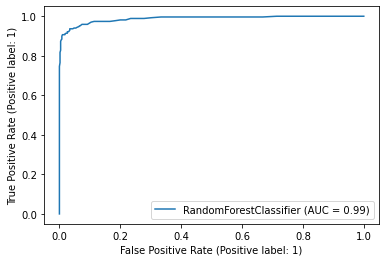

In [46]:
metrics.plot_roc_curve(forest, X, y)

----------------------------------
#### Part 2: Using a Grid Search
- import GridSearchCV from sklearn

In [48]:
from sklearn.model_selection import GridSearchCV

* create grid (optimize for number of trees and max depth in one tree)

In [69]:
depths = [forest.estimators_[i].get_depth() for i in range(len(forest.estimators_))]
print(max(depths), min(depths))

20 12


In [74]:
grid = {"n_estimators": [10, 50, 100, 200], "max_depth": [12,14,16,18,20]}

In [75]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, n_jobs=-1)

* fit training data with grid search

In [76]:
grid_search = grid_search.fit(X_train, y_train)

In [77]:
grid_search.best_score_

0.7720111955217913

In [78]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=200)

In [81]:
grid_search.score(X_test, y_test)

0.7792207792207793

In [82]:
grid2 = {"n_estimators": [150, 200, 250], "max_depth": [13,14,15]}
grid_search2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid2, n_jobs=-1)
grid_search2.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': [150, 200, 250]})

In [83]:
grid_search2.best_score_

0.7687724910035986

In [84]:
grid_search2.best_estimator_

RandomForestClassifier(max_depth=13, n_estimators=200)

In [86]:
grid_search2.best_params_

{'max_depth': 13, 'n_estimators': 200}

In [85]:
dir(grid_search2)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [89]:
forest.score(X_test, y_test)

0.7792207792207793

**train a new model with best params**

In [92]:
forest2 = RandomForestClassifier(n_estimators=200, max_depth=14)
forest2.fit(X_train, y_train)
y_pred2 = forest2.predict(X_test)

RandomForestClassifier(max_depth=14, n_estimators=200)

* print confusion matrix with the best model

In [91]:
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [93]:
cf2 = metrics.confusion_matrix(y_test, y_pred2)
cf2

array([[94,  8],
       [23, 29]])

In [94]:
cf

array([[91, 11],
       [23, 29]])

* print AUC with the best model

In [95]:
y_proba2 = forest2.predict_proba(X_test)

In [100]:
# forest2 model score
metrics.roc_auc_score(y_test, y_proba2[:,1])

0.8501131221719457

In [101]:
# forest model score
metrics.roc_auc_score(y_test, y_proba[:,1])

0.8503016591251886

- is the model better than default?

The models are virtually the same

forest2 classified 94 True postitives and 8 False positives  
forest classified 91 True positives and 11 False positives

all else was equal